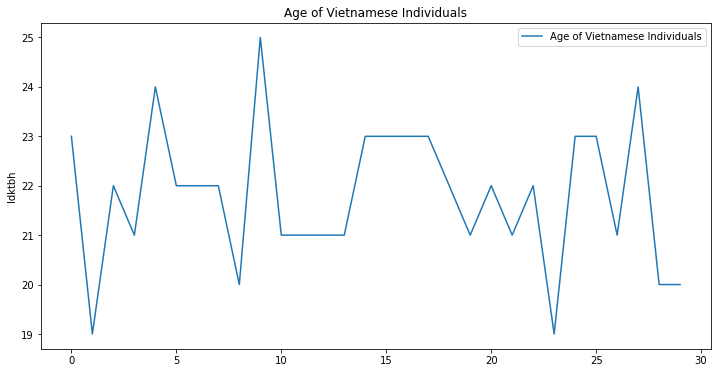

In [14]:
#for visualization/import

import os
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

#load Vietnaemse data csv file
viet=pd.read_csv(os.getcwd()+'\\Vietnam\\ToyoVietnameseEdited.csv') #index_col=0, parse_dates=True, do I need these?

#load Japanese data cvs file
jpns=pd.read_csv(os.getcwd()+'\\japan\\ToyoJapaneseEdited.csv')

fig, ax = plt.subplots()

df=viet['Please enter your age']
df.plot(ax=ax, figsize=(12,6), label='Age of Vietnamese Individuals')

plt.legend()
plt.ylabel('Idktbh')    
plt.title('Age of Vietnamese Individuals')
#plt.savefig('AdjustedStockValuesGAFA.jpg')
plt.show();

In [15]:
#student variable object
class student:
    #independent variables
    #gender, age, location, familyNum, familyFeelings, tanshin, cramSchool, transfer, manyFriends =None,None,None,None,None,None,None,None,None

    #dependent variables by question (0-15)
    #dependent=[None]*16
    
    #sets variables in instantiation
    #def __init__(self):
    #    dependent=[None]*16
    
    def __init__(self, df):
        #independent
        self.dependent=[None]*16
        self.gender=int(df[0])
        self.age=int(df[1])
        self.location=int(df[2])
        self.familyNum=str(df[3])
        self.familyFeelings=str(df[4])
        self.tanshin=int(df[5])
        self.cramSchool=int(df[6])
        self.transfer=df[7]
        self.manyFriends=df[8]
        #dependent
        for num in range(16):
            self.dependent[num]=int(df[num+9])
        
    def testPrint(self):
        print("the dependent variables:")
        print(self.dependent)
    
    #find scores for association to the categories of bullying
    def calcCat1Score(self):
        return self.dependent[0]+self.dependent[4]+self.dependent[8]+self.dependent[12]
    def calcCat2Score(self):
        return self.dependent[1]+self.dependent[5]+self.dependent[9]+self.dependent[13]
    def calcCat3Score(self):
        return self.dependent[2]+self.dependent[6]+self.dependent[10]+self.dependent[14]
    def calcCat4Score(self):
        return self.dependent[3]+self.dependent[7]+self.dependent[11]+self.dependent[15]
    
    #return independent variables in row and each of the four cat dependent variables in a colomun, in a table
    #def cat1Table(self):
        #return [[1],[calcCat1Score]]

In [18]:
#global variables
#imports all students
allViet=[None]*30
allJpns=[None]*30
for num in range(30):
    allViet[num]=student(viet.iloc[num,2:])
    allJpns[num]=student(jpns.iloc[num,2:])

#sets up the Chi Squared info
chiTest=[[0]*13,[0]*13]
chiTest2=[[],[]]
#creates new list of students based on independent variable
newViet=[]
newJpns=[]
#resets Chi Squared and new list info
def chiReset():
    global chiTest
    global chiTest2
    global newViet
    global newJpns
    chiTest.clear()
    chiTest=[[0]*13,[0]*13]
    chiTest2.clear()
    chiTest2=[[],[]]
    newViet.clear()
    newViet=[]
    newJpns.clear()
    newJpns=[]

    
    
#imports Category1 scores  chiTest
def cat1ChiImport(lst,lst2):
    for num in range(len(lst)):
        chiTest[0][lst[num].calcCat1Score()]+=1
    for num in range(len(lst2)):
        chiTest[1][lst2[num].calcCat1Score()]+=1
    reduce0()
#imports Category2 scores  chiTest
def cat2ChiImport(lst,lst2):
    for num in range(len(lst)):
        chiTest[0][lst[num].calcCat2Score()]+=1
    for num in range(len(lst2)):
        chiTest[1][lst2[num].calcCat2Score()]+=1
    reduce0()
#imports Category3 scores  chiTest
def cat3ChiImport(lst,lst2):
    for num in range(len(lst)):
        chiTest[0][lst[num].calcCat3Score()]+=1
    for num in range(len(lst2)):
        chiTest[1][lst2[num].calcCat3Score()]+=1
    reduce0()
#imports Category4 scores  chiTest
def cat4ChiImport(lst,lst2):
    for num in range(len(lst)):
        chiTest[0][lst[num].calcCat4Score()]+=1
    for num in range(len(lst2)):
        chiTest[1][lst2[num].calcCat4Score()]+=1
    reduce0()

#reduces paired 0's from chiTest
def reduce0():
    for num in range(13):
        if chiTest[0][num]==0 and chiTest[1][num]==0:
            pass
        else:
            chiTest2[0].append(chiTest[0][num])
            chiTest2[1].append(chiTest[1][num])

            

#adds to newViet and newJpns the total number of individuals who have parents who live and work away from home
def tanshinCalc():
    for num in range(30):
        if allViet[num].tanshin==1:
            newViet.append(allViet[num])
    for num in range(30):
        if allJpns[num].tanshin==1:
            newJpns.append(allJpns[num])

#adds to newViet and newJpns the total number of individuals who went to cram school            
def cramCalc():
    for num in range(30):
        if allViet[num].cramSchool==1:
            newViet.append(allViet[num])
    for num in range(30):
        if allJpns[num].cramSchool==1:
            newJpns.append(allJpns[num])

#adds to newViet and newJpns the total number of individuals who did not go to cram school    
def noCramCalc():
    for num in range(30):
        if allViet[num].cramSchool==0:
            newViet.append(allViet[num])
    for num in range(30):
        if allJpns[num].cramSchool==0:
            newJpns.append(allJpns[num])
            
#adds to newViet and newJpns the total number of individuals who had >3 individuals in their family    
def familyFourPlus():
    for num in range(30):
        if allViet[num].familyNum!='1' and allViet[num].familyNum!='2' and allViet[num].familyNum!='3':
            newViet.append(allViet[num])
    for num in range(30):
        if allJpns[num].familyNum!='1' and allJpns[num].familyNum!='2' and allJpns[num].familyNum!='3':
            newJpns.append(allJpns[num])
            
#adds to newViet and newJpns the total number of female individuals
def femaleTest():
    for num in range(30):
        if allViet[num].gender==1:
            newViet.append(allViet[num])
    for num in range(30):
        if allJpns[num].gender==1:
            newJpns.append(allJpns[num])
#adds to newViet and newJpns the total number of individuals who had at least a positive relationship with their family
def famScorePos():
    for num in range(30):
        if allViet[num].familyFeelings!='1' and allViet[num].familyFeelings!='2' and allViet[num].familyFeelings!='3':
            newViet.append(allViet[num])
    for num in range(30):
        if allJpns[num].familyFeelings!='1' and allJpns[num].familyFeelings!='2' and allJpns[num].familyFeelings!='3':
            newJpns.append(allJpns[num])
            
#adds to newViet and newJpns the total number of individuals who had a neutral
def famScoreNeu():
    for num in range(30):
        if allViet[num].familyFeelings=='3':
            newViet.append(allViet[num])
    for num in range(30):
        if allJpns[num].familyFeelings=='3':
            newJpns.append(allJpns[num])
            

In [20]:
#testcell
print("based on all responses")

#cat1 all
cat1ChiImport(allViet,allJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat1 is " + str(p), "teststat="+str(stat))
chiReset()

#cat2 all
cat2ChiImport(allViet,allJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat2 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat3 all
cat3ChiImport(allViet,allJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat3 is " + str(p)+", teststat="+str(stat))
#print(chiTest)
chiReset()

#cat4 all
cat4ChiImport(allViet,allJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat4 is " + str(p)+", teststat="+str(stat))
chiReset()




#Cram School
print("")
print("based on cram school")
cramCalc()
print("Viet Length: "+str(len(newViet)))
print("Jpns Length: "+str(len(newJpns)))

#cat1
cat1ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat1 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat2
cramCalc()
cat2ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat2 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat3
cramCalc()
cat3ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat3 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat4
cramCalc()
cat4ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat4 is " + str(p)+", teststat="+str(stat))
chiReset()




#No Cram School
print("")
print("based on no cram school")
noCramCalc()
print("Viet Length: "+str(len(newViet)))
print("Jpns Length: "+str(len(newJpns)))

#cat1
cat1ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat1 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat2
noCramCalc()
cat2ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat2 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat3
noCramCalc()
cat3ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat3 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat4
noCramCalc()
cat4ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat4 is " + str(p)+", teststat="+str(stat))
chiReset()




#Four or more members in household
print("")
print("Four or more family members in household")
familyFourPlus()
print("Viet Length: "+str(len(newViet)))
print("Jpns Length: "+str(len(newJpns)))

#cat1
cat1ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat1 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat2
familyFourPlus()
cat2ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat2 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat3
familyFourPlus()
cat3ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat3 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat4
familyFourPlus()
cat4ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat4 is " + str(p)+", teststat="+str(stat))
chiReset()



#For females
print("")
print("female data")
femaleTest()
print("Viet Length: "+str(len(newViet)))
print("Jpns Length: "+str(len(newJpns)))

#cat1
cat1ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat1 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat2
femaleTest()
cat2ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat2 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat3
femaleTest()
cat3ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat3 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat4
femaleTest()
cat4ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat4 is " + str(p)+", teststat="+str(stat))
chiReset()



#For relationship>3
print("")
print("pos relationsip")
famScorePos()
print("Viet Length: "+str(len(newViet)))
print("Jpns Length: "+str(len(newJpns)))

#cat1
cat1ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat1 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat2
famScorePos()
cat2ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat2 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat3
famScorePos()
cat3ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat3 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat4
famScorePos()
cat4ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat4 is " + str(p)+", teststat="+str(stat))
chiReset()


#For relationship==3
print("")
print("neutral data")
famScoreNeu()
print("Viet Length: "+str(len(newViet)))
print("Jpns Length: "+str(len(newJpns)))

#cat1
cat1ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat1 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat2
famScoreNeu()
cat2ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat2 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat3
famScoreNeu()
cat3ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat3 is " + str(p)+", teststat="+str(stat))
chiReset()

#cat4
famScoreNeu()
cat4ChiImport(newViet,newJpns)
stat, p, dof, expected = chi2_contingency(chiTest2)
alpha = 0.05
print("p value for cat4 is " + str(p)+", teststat="+str(stat))
chiReset()

based on all responses
p value for cat1 is 0.41471053727976165 teststat=8.194444444444445
p value for cat2 is 0.20559038067361912, teststat=14.519047619047619
p value for cat3 is 0.05253604733838628, teststat=20.855555555555554
p value for cat4 is 0.5044705904803908, teststat=11.287301587301588

based on cram school
Viet Length: 17
Jpns Length: 20
p value for cat1 is 0.39824687526062125, teststat=8.369353832442068
p value for cat2 is 0.36047393566289465, teststat=10.962156862745097
p value for cat3 is 0.17019691187010239, teststat=15.276232492997199
p value for cat4 is 0.8344693913362049, teststat=7.338333333333333

based on no cram school
Viet Length: 13
Jpns Length: 10
p value for cat1 is 0.5316389142817766, teststat=5.095384615384615
p value for cat2 is 0.07711028753089218, teststat=14.183333333333334
p value for cat3 is 0.2572157933110671, teststat=11.27673992673993
p value for cat4 is 0.4323207586513155, teststat=11.131410256410257

Four or more family members in household
Viet Le

In [7]:
#ignore below




#chi squared tests
#formula

#methods to calc Expected value
def expectedVal1(group):
    val=0
    for num in range(len(group)):
        val+=group[num].dependent[0]+group[num].dependent[4]+group[num].dependent[8]+group[num].dependent[12]
    return val/len(group)

def expectedVal2(group):
    val=0
    for num in range(len(group)):
        val+=group[num].dependent[1]+group[num].dependent[5]+group[num].dependent[9]+group[num].dependent[13]
    return val/len(group)

def expectedVal3(group):
    val=0
    for num in range(len(group)):
        val+=group[num].dependent[2]+group[num].dependent[6]+group[num].dependent[10]+group[num].dependent[14]
    return val/len(group)

def expectedVal4(group):
    val=0
    for num in range(len(group)):
        val+=group[num].dependent[3]+group[num].dependent[7]+group[num].dependent[11]+group[num].dependent[15]
    return val/len(group)

vietExpected1=expectedVal1(allViet)
vietExpected2=expectedVal2(allViet)
vietExpected3=expectedVal3(allViet)
vietExpected4=expectedVal4(allViet)

jpnsExpected1=expectedVal1(allJpns)
jpnsExpected2=expectedVal2(allJpns)
jpnsExpected3=expectedVal3(allJpns)
jpnsExpected4=expectedVal4(allJpns)

print(jpnsExpected1)


2.6666666666666665


In [8]:
#for exporting by independent variable

vietNoCramSchool=[]
vietYesCramSchool=[]

for row in range(30):
    test=0
    #display(viet)
    #display(viet.iloc[row])
    #print(viet.iloc[row,8])
    if viet.iloc[row,8]==0:
        vietNoCramSchool.append(viet.iloc[row,10:])
        test+=1
    elif viet.iloc[row,8]==1:
        vietYesCramSchool.append(viet.iloc[row,10:])
        test+=1
    else:
        test+=1

